<a href="https://colab.research.google.com/github/aartivjadhav/machine_learning/blob/main/NetflixProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from datetime import datetime

start = datetime.now()
    # Create a file 'data.csv' before reading it
    # Read all the files in netflix and store them in one big file('data.csv')
    # reading from each of the four files and appending each rating to a global file 'train.csv'
data = open('data.csv', mode='w')
row = list()
files=['combined_data_1.txt','combined_data_2.txt',
      'combined_data_3.txt', 'combined_data_4.txt']
for file in files:
  # file = "combined_data_1.txt"
  print("Reading ratings from {}...".format(file))
  with open(file) as f:
    for line in f:
      del row[:]
      line = line.strip()
      if line.endswith(':'):
        # All below are ratings for this movie, until another movie appears.
        movie_id = line.replace(':', '')
      else:
        row = [x for x in line.split(',')]
        row.insert(0, movie_id)
        data.write(','.join(row))
        data.write('\n')
print("Done.\n")
data.close()
print('Time taken :', datetime.now() - start)

Reading ratings from combined_data_1.txt...
Reading ratings from combined_data_2.txt...
Reading ratings from combined_data_3.txt...
Reading ratings from combined_data_4.txt...
Done.

Time taken : 0:00:00.282191


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv',names=['movie_id','user_id','rating','date'])
df.head()

,movie_id,user_id,rating,date
0,1,1488844,3.0,2005-09-06
1,1,822109,5.0,2005-05-13
2,1,885013,4.0,2005-10-19
3,1,30878,4.0,2005-12-26
4,1,823519,3.0,2004-05-03


In [ ]:
df.count()

movie_id    203779
user_id     203779
rating      203778
date        203778
dtype: int64

In [ ]:
# df.reset_index(drop=True, inplace=True)

In [ ]:
df.sample(5)

,movie_id,user_id,rating,date
183000,13382,2049947,1.0,2005-04-13
154079,13370,667102,4.0,2004-08-25
40446,18,38941,4.0,2005-05-14
178511,13379,2171187,3.0,2005-02-28
66712,4506,20616,5.0,2003-07-03


In [ ]:
df.shape

(203779, 4)

In [ ]:
# groupby ratings
stars = df.groupby('rating')['rating'].count()

In [ ]:
stars

rating
1.0    11341
2.0    21322
3.0    60035
4.0    66981
5.0    44099
Name: rating, dtype: int64

In [ ]:
# rating count
df.isna().sum()
df[df['rating'].isna()]  #152838, 305669, 458504
# df.drop(index=152838,inplace=True)
# df.drop(index=305669,inplace=True)
# df.drop(index=458504,inplace=True)


,movie_id,user_id,rating,date
152832,9232,51554,NaN,NaN


In [ ]:
# counting the number of movies
movie_count = df.movie_id.nunique()

In [ ]:
# counting number of users
user_count = df.user_id.nunique()

In [ ]:
# counting ratings
rating_count = df.rating.count()

In [ ]:
print('movie count : ',movie_count, 'user_count',user_count,'rating_count',rating_count)

movie count :  78 user_count 116117 rating_count 203778


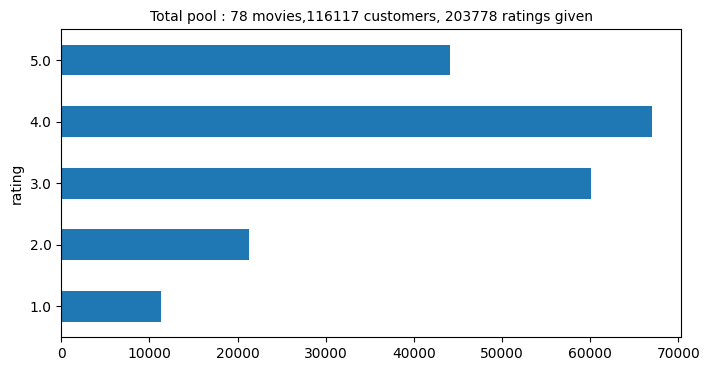

In [ ]:
ax = stars.plot(kind='barh',legend=False,figsize=(8,4))
plt.title(f'Total pool : {movie_count} movies,{user_count} customers, {rating_count} ratings given',fontsize=10)
plt.show()

In [ ]:
df.head()

,movie_id,user_id,rating,date
0,1,1488844,3.0,2005-09-06
1,1,822109,5.0,2005-05-13
2,1,885013,4.0,2005-10-19
3,1,30878,4.0,2005-12-26
4,1,823519,3.0,2004-05-03


In [ ]:
# removing the users that have rated less movies and also movies that are rated less
# grouping the movies by users so that we can remove the users who have rated less movies
user_id_summary = df.groupby('movie_id')['user_id'].agg(['count','mean'])

In [ ]:
user_id_summary

,count,mean
movie_id,,
1,547,1.249876e+06
2,145,1.341926e+06
3,2012,1.324290e+06
4,142,1.402854e+06
5,1140,1.302384e+06
...,...,...
13380,1776,1.313588e+06
13381,1511,1.295502e+06
13382,6774,1.323111e+06


In [ ]:
# grouping the movies based on rating so that we can remove the movies that have less rating
rating_summary = df.groupby('movie_id')['rating'].agg(['count','mean'])

In [ ]:
rating_summary

,count,mean
movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
13380,1776,3.954955
13381,1511,2.880212
13382,6774,3.172867


In [ ]:
rating_summary.index = rating_summary.index.map(int)

In [ ]:
# set the rating benchmark
movie_benchmark = round(rating_summary['count'].quantile(0.7),0)
movie_benchmark

2006.0

In [ ]:
rating_summary['count']

movie_id
1         547
2         145
3        2012
4         142
5        1140
         ... 
13380    1776
13381    1511
13382    6774
13383    7602
13384    7359
Name: count, Length: 78, dtype: int64

In [ ]:
# movies having the rating less than the benchmark will be removed
drop_movie_list = rating_summary[rating_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([    1,     2,     4,     5,     6,     7,     9,    10,    11,
               12,    13,    14,    15,    19,    20,    21,    22,    23,
               24,    25,  4500,  4501,  4502,  4503,  4504,  4505,  4510,
             4511,  4512,  9211,  9212,  9213,  9214,  9215,  9216,  9219,
             9220,  9221,  9223,  9225,  9226,  9227,  9230, 13368, 13369,
            13371, 13372, 13373, 13374, 13375, 13376, 13377, 13380, 13381],
           dtype='int64', name='movie_id')

In [ ]:
# removing the users that are currently inactive
user_id_summary.index = user_id_summary.index.map(int)

In [ ]:
# setting the benchmark for users so that we can remove the users who have rated less movies
user_benchmark = round(user_id_summary['count'].quantile(0.7),0)

In [ ]:
user_benchmark

2006.0

In [ ]:
drop_user_list = user_id_summary[user_id_summary['count']<user_benchmark].index
drop_user_list

Int64Index([    1,     2,     4,     5,     6,     7,     9,    10,    11,
               12,    13,    14,    15,    19,    20,    21,    22,    23,
               24,    25,  4500,  4501,  4502,  4503,  4504,  4505,  4510,
             4511,  4512,  9211,  9212,  9213,  9214,  9215,  9216,  9219,
             9220,  9221,  9223,  9225,  9226,  9227,  9230, 13368, 13369,
            13371, 13372, 13373, 13374, 13375, 13376, 13377, 13380, 13381],
           dtype='int64', name='movie_id')

In [ ]:
print('original data shape : ',df.shape)

original data shape :  (203779, 4)


In [ ]:
df = df[~df['movie_id'].isin(drop_movie_list)]
df = df[~df['user_id'].isin(drop_user_list)]
print('after benchmarking shape : ',df.shape)

after benchmarking shape :  (175440, 4)


In [ ]:
# pivaot table is used for analysing the large amount of data in different ways
# singular value decomposition (SVD) is used in recommendation systems, image compression and data denoising.
# also used in NLP to extract most important features from the corpus of documents

# The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices.
# It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations.
# It also has some important applications in data science. In this article, I will try to explain the mathematical intuition behind SVD
# and its geometrical meaning.
# The SVD of  mxn matrix A is given by the formula is- A = UWV^{T}
# where:
# U:  mxn matrix of the orthonormal eigenvectors of AA^{T}                      .
# VT: transpose of a nxn matrix containing the orthonormal eigenvectors of A^{T}A.
# W:  a nxn diagonal matrix of the singular values which are the square roots of the eigenvalues of A^{T}A.

In [ ]:
# preparing the dataset for SVD it takes matrix as input, hence converting the data into sparse matrix.

df_p = pd.pivot_table(df,values='rating',index='user_id',columns='movie_id')

In [ ]:
print(df_p.shape)

(106869, 24)


In [ ]:
df_p.head()

movie_id,3,8,16,17,18,26,4506,4507,4508,4509,...,9228,9229,9231,9232,13370,13378,13379,13382,13383,13384
user_id,,,,,,,,,,,,,,,,,,,,,
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
colnames = ['movie_id','year','title']
df_title = pd.read_csv('movie_titles.csv',encoding='ISO-8859-1',names=colnames,header=None)
df_title.set_index('movie_id',inplace=True)

In [ ]:
# df_title.drop(['year','title'],inplace=True)
# df_t = df_t.iloc[0:0]
# df_title.dropna(inplace=True)
df_title

,year,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
  # Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.
  # Surprise was designed with the following purposes in mind: Give users perfect control over their experiments.

!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3096310 sha256=2ec390e200202bc53647cf7f570546388c0ed88328819f82d8c2ae1e12001e5e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [ ]:
# helps to read the data from the SVD algorithm
reader = Reader()

In [ ]:
data = Dataset.load_from_df(df[['movie_id','user_id','rating']][:100000],reader)

In [ ]:
svd = SVD()
cross_validate(svd,data,measures=['RMSE','MAE'],cv=3,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0609  1.0603  1.0563  1.0592  0.0020  
MAE (testset)     0.8411  0.8432  0.8482  0.8442  0.0030  
Fit time          2.07    1.55    1.58    1.74    0.24    
Test time         0.23    0.20    0.39    0.27    0.08    


{'test_rmse': array([1.06094607, 1.06030814, 1.05632746]),
 'test_mae': array([0.84112564, 0.8432206 , 0.8481906 ]),
 'fit_time': (2.074256420135498, 1.5491509437561035, 1.582648754119873),
 'test_time': (0.23116350173950195, 0.19696927070617676, 0.3888416290283203)}

In [ ]:
df.head()

,movie_id,user_id,rating,date
692,3,1025579,4.0,2003-03-29
693,3,712664,5.0,2004-02-01
694,3,1331154,4.0,2004-07-03
695,3,2632461,3.0,2005-07-22
696,3,44937,5.0,2004-06-22


In [ ]:
# try to recommend movies to user 712664
data_712664 = df[(df['user_id']==712664) & (df['rating']==5)]
data_712664 = data_712664.set_index('movie_id')
data_712664 = data_712664.join(df_title)['title']
data_712664

# following are the movies recommended for user 712664 where he has given 5 star rating

movie_id
3       Character
9228       Sleuth
9229       Colors
Name: title, dtype: object

In [ ]:
# bulding the recommendation algorithm
# first make the shallow copy of the df_titles.csv file so that changes can be made
user_712664 = df_title.copy()
user_712664

,year,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user_712664.reset_index(inplace=True)
user_712664

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# removing the movies below benchmark
user_712664 = user_712664[~user_712664['movie_id'].isin(drop_movie_list)]
user_712664

,movie_id,year,title
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# training the algorithm with whole dataset
data = Dataset.load_from_df(df[['user_id','movie_id','rating']],reader)

In [ ]:
# building the taining dataset using surprise package
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
user_712664['estimation_score'] = user_712664['movie_id'].apply(lambda x: svd.predict(712664,x).est)
user_712664 = user_712664.drop('movie_id',axis=1)

<ipython-input-131-47006b25de4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['estimation_score'] = user_712664['movie_id'].apply(lambda x: svd.predict(712664,x).est)


In [ ]:
user_712664 = user_712664.sort_values('estimation_score')
print(user_712664.head(10))

         year                                    title  estimation_score
2      1997.0                                Character                 5
11845  1985.0                           Prizzi's Honor                 5
11846  2005.0                            Dust to Glory                 5
11847  1997.0                     For Richer or Poorer                 5
11848  1998.0                                    Earth                 5
11849  2003.0  Dumb and Dumberer: When Harry Met Lloyd                 5
11850  1946.0                             The Yearling                 5
11851  1991.0                Return to the Blue Lagoon                 5
11852  1982.0                       Privates on Parade                 5
11853  1939.0                   Only Angels Have Wings                 5


In [ ]:
user_712664 = user_712664.sort_values('estimation_score',ascending=False)
print(user_712664.head(10))

      year                                              title  \
2   1997.0                                          Character   
32  2000.0                     Aqua Teen Hunger Force: Vol. 1   
51  2002.0                            The Weather Underground   
37  2003.0                                 Daydream Obsession   
36  1973.0                              Zatoichi's Conspiracy   
35  1992.0                                    Lady Chatterley   
34  2000.0                    Ferngully 2: The Magical Rescue   
33  2003.0  Ashtanga Yoga: Beginner's Practice with Nicki ...   
31  2004.0  ABC Primetime: Mel Gibson's The Passion of the...   
16  2005.0                                          7 Seconds   

    estimation_score  
2                  5  
32                 5  
51                 5  
37                 5  
36                 5  
35                 5  
34                 5  
33                 5  
31                 5  
16                 5  
